In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns

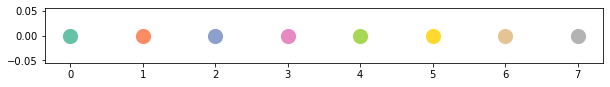

In [2]:
cmap = mpl.cm.get_cmap("Set2")
x = np.arange(0,1,0.01)
cmap_categ_raw = cmap(x)

cmap_categ = []
count = 0
for i in range(cmap_categ_raw.shape[0]):
    if i == 0:
        cmap_categ.append(cmap_categ_raw[i])
    elif np.sum(cmap_categ_raw[i] - cmap_categ[count]) != 0:
        cmap_categ.append(cmap_categ_raw[i])
        count += 1

plt.figure(figsize = (10,1))
for i in range(len(cmap_categ)):
    plt.scatter(i, 0, color=cmap_categ[i], s=200)

## Full figure

In [3]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

true8_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true8_na = np.load("/media/hdd01/sklee/CA1_clust8-30/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

true12_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true12_na = np.load("/media/hdd01/sklee/CA1_clust12-20/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

one8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h1_output.npz")["test"] + true8_nona_mean
two8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/glm_s14_h2_output.npz")["test"] + true8_nona_mean
gru8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"] + true8_nona_mean
one8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h1_output.npz")["test"]
two8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h2_output.npz")["test"]
gru8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]

one12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h1_output.npz")["test"] + true12_nona_mean
two12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/glm_s18_h2_output.npz")["test"] + true12_nona_mean
gru12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"] + true12_nona_mean
one12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h1_output.npz")["test"]
two12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h2_output.npz")["test"]
gru12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]

two4_diff_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["e_kern"]
two4_diff_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["i_kern"]
two4_diff_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["nonlin_in"]

one4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["sub_out"][-1,-4:]
two4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["sub_out"][-1,-4:]
gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["sub_out"][-1,-4:]
true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend = true4_dend_na - true4_dend_nona

one4_diff_subout -= np.mean(one4_diff_subout, axis=1).reshape(-1,1)
two4_diff_subout -= np.mean(two4_diff_subout, axis=1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

In [4]:
diff_var_exp_array = np.zeros((3,3,20))
nona_var_exp_array = np.zeros((3,3,20))

for i in range(20):
    diff_var_exp_array[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_test[i])
    diff_var_exp_array[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_test[i])
    diff_var_exp_array[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_test[i])
    nona_var_exp_array[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_test[i])
    nona_var_exp_array[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_test[i])
    nona_var_exp_array[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_test[i])
    
    diff_var_exp_array[1,0,i] = explained_variance_score(true8_diff[i], one8_diff_test[i])
    diff_var_exp_array[1,1,i] = explained_variance_score(true8_diff[i], two8_diff_test[i])
    diff_var_exp_array[1,2,i] = explained_variance_score(true8_diff[i], gru8_diff_test[i])
    nona_var_exp_array[1,0,i] = explained_variance_score(true8_nona[i], one8_nona_test[i])
    nona_var_exp_array[1,1,i] = explained_variance_score(true8_nona[i], two8_nona_test[i])
    nona_var_exp_array[1,2,i] = explained_variance_score(true8_nona[i], gru8_nona_test[i])
    
    diff_var_exp_array[2,0,i] = explained_variance_score(true12_diff[i], one12_diff_test[i])
    diff_var_exp_array[2,1,i] = explained_variance_score(true12_diff[i], two12_diff_test[i])
    diff_var_exp_array[2,2,i] = explained_variance_score(true12_diff[i], gru12_diff_test[i])
    nona_var_exp_array[2,0,i] = explained_variance_score(true12_nona[i], one12_nona_test[i])
    nona_var_exp_array[2,1,i] = explained_variance_score(true12_nona[i], two12_nona_test[i])
    nona_var_exp_array[2,2,i] = explained_variance_score(true12_nona[i], gru12_nona_test[i])
    
thresh_bin_no = 200

nona_means = np.zeros((thresh_bin_no, 4))
nona_stds = np.zeros((thresh_bin_no, 4))
nona_bins = np.linspace(np.min(true4_nona), np.max(true4_nona), thresh_bin_no+1)

diff_means = np.zeros((thresh_bin_no, 4))
diff_stds = np.zeros((thresh_bin_no, 4))
diff_bins = np.linspace(np.min(true4_diff), np.max(true4_diff), thresh_bin_no+1)

for i in range(thresh_bin_no):
    
    nona_idx = np.where((true4_nona.flatten() >= nona_bins[i]) & (true4_nona.flatten() < nona_bins[i+1]))[0]
    nona_means[i,1] = np.mean(one4_nona_test.flatten()[nona_idx])
    nona_means[i,2] = np.mean(two4_nona_test.flatten()[nona_idx])
    nona_means[i,3] = np.mean(gru4_nona_test.flatten()[nona_idx])
    nona_means[i,0] = (nona_bins[i] + nona_bins[i+1])/2
    nona_stds[i,0] = (nona_bins[i] + nona_bins[i+1])/2
    nona_stds[i,1] = np.std(one4_nona_test.flatten()[nona_idx])
    nona_stds[i,2] = np.std(two4_nona_test.flatten()[nona_idx])
    nona_stds[i,3] = np.std(gru4_nona_test.flatten()[nona_idx])
    
    diff_idx = np.where((true4_diff.flatten() >= diff_bins[i]) & (true4_diff.flatten() < diff_bins[i+1]))[0]
    diff_means[i,1] = np.mean(one4_diff_test.flatten()[diff_idx])
    diff_means[i,2] = np.mean(two4_diff_test.flatten()[diff_idx])
    diff_means[i,3] = np.mean(gru4_diff_test.flatten()[diff_idx])
    diff_means[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,1] = np.std(one4_diff_test.flatten()[diff_idx])
    diff_stds[i,2] = np.std(two4_diff_test.flatten()[diff_idx])
    diff_stds[i,3] = np.std(gru4_diff_test.flatten()[diff_idx])
    

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<ipython-input-44-990bbfa773be>:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-44-990bbfa773be>:349: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig("/home/sklee/dendrite/fig4/fig4_raw.pdf", bbox_inches="tight", transparent=True)
/home/sklee/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


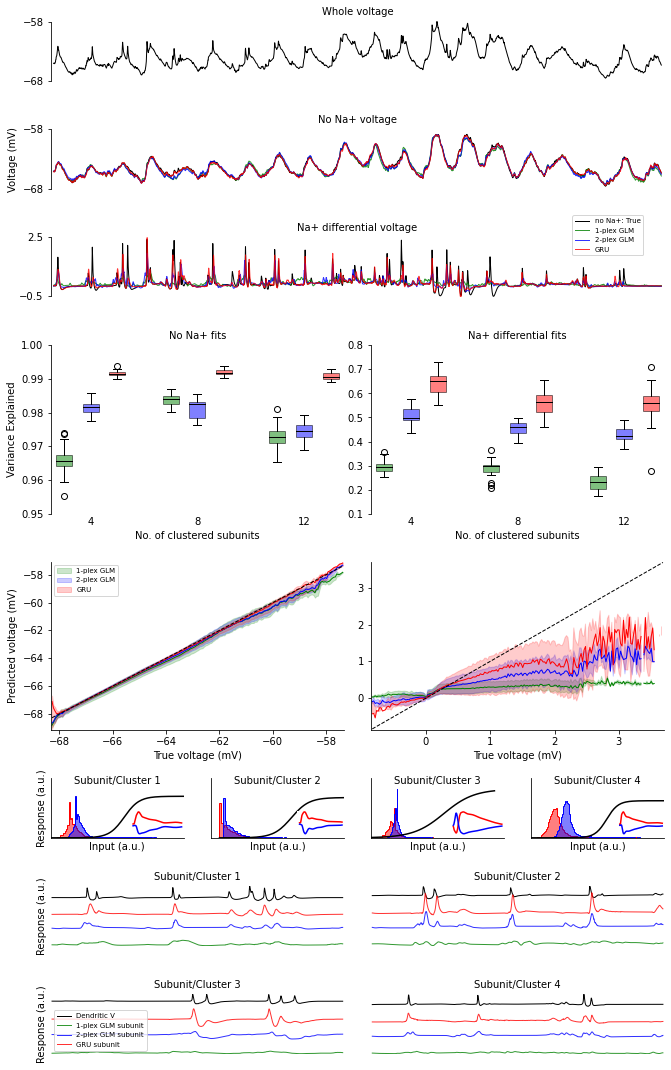

In [44]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
bin_no = 250

fig = plt.figure(constrained_layout=True, figsize = (11,19))
gs = fig.add_gridspec(10,12, wspace=1, hspace=0.8)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,:])
ax4 = fig.add_subplot(gs[3:5,:6])
ax5 = fig.add_subplot(gs[3:5,6:])
ax6 = fig.add_subplot(gs[7,:3])
ax7 = fig.add_subplot(gs[7,3:6])
ax8 = fig.add_subplot(gs[7,6:9])
ax9 = fig.add_subplot(gs[7,9:])
ax10 = fig.add_subplot(gs[8,:6])
ax11 = fig.add_subplot(gs[8,6:])
ax12 = fig.add_subplot(gs[9,:6])
ax13 = fig.add_subplot(gs[9,6:])
ax14 = fig.add_subplot(gs[5:7,6:])
ax15 = fig.add_subplot(gs[5:7,:6])

ax1.plot(np.arange(0,2.4,1/5000), true4_na[-1][17000:29000], linewidth=1, color="black")
ax1.margins(x=0.005, y=0.005)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_bounds(-68,-58)
ax1.set_yticks([-68,-58])
ax1.set_xticks([])
ax1.set_title("Whole voltage", fontsize=10)

ax2.plot(np.arange(0,2.4,1/5000), true4_nona[-1][17000:29000], linewidth=1, color="black", label="no Na+: True")
ax2.plot(np.arange(0,2.4,1/5000), one4_nona_test[-1][17000:29000], linewidth=1, color="green", label="1-plex GLM", alpha=0.8)
ax2.plot(np.arange(0,2.4,1/5000), two4_nona_test[-1][17000:29000], linewidth=1, color="blue", label="2-plex GLM", alpha=0.8)
ax2.plot(np.arange(0,2.4,1/5000), gru4_nona_test[-1][17000:29000], linewidth=1, color="red", label="GRU", alpha=0.8)
ax2.margins(x=0.005, y=0.005)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_bounds(-68,-58)
ax2.set_yticks([-68,-58])
ax2.set_xticks([])
ax2.set_ylabel("Voltage (mV)")
ax2.set_title("No Na+ voltage", fontsize=10)

ax3.plot(np.arange(0,2.4,1/5000), true4_diff[-1][17000:29000], linewidth=1, color="black", label="no Na+: True")
ax3.plot(np.arange(0,2.4,1/5000), one4_diff_test[-1][17000:29000], linewidth=1, color="green", label="1-plex GLM", alpha=0.8)
ax3.plot(np.arange(0,2.4,1/5000), two4_diff_test[-1][17000:29000], linewidth=1, color="blue", label="2-plex GLM", alpha=0.8)
ax3.plot(np.arange(0,2.4,1/5000), gru4_diff_test[-1][17000:29000], linewidth=1, color="red", label="GRU", alpha=0.8)
ax3.margins(x=0.005, y=0.005)
ax3.legend(loc=(0.85,0.7), fontsize=7)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.spines.left.set_bounds(-0.5,2.5)
ax3.set_yticks([-0.5,2.5])
ax3.set_xticks([])
ax3.set_title("Na+ differential voltage", fontsize=10)

colors = ["green", "blue", "red"]
# first boxplot pair
bp = ax5.boxplot(diff_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = ax5.boxplot(diff_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = ax5.boxplot(diff_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
ax5.set_xticks([2,6,10])
ax5.set_xticklabels(["4", "8", "12"])
ax5.set_xlabel("No. of clustered subunits")
ax5.set_ylim(0.1,0.8)
ax5.margins(x=0.005, y=0.005)
ax5.spines.right.set_visible(False)
ax5.spines.top.set_visible(False)
ax5.set_title("Na+ differential fits", fontsize=10)
ax5.spines.bottom.set_visible(False)
ax5.tick_params(axis="x", length=0)

#hB, = ax4.plot(1,1,'blue')
#hR, = ax4.plot(1,1,'red')
#hG, = ax4.plot(1,1,'green')
#ax4.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
#hB.set_visible(False)
#hR.set_visible(False)
#hG.set_visible(False)

# first boxplot pair
bp = ax4.boxplot(nona_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = ax4.boxplot(nona_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = ax4.boxplot(nona_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
ax4.set_xticks([2,6,10])
ax4.set_xticklabels(["4", "8", "12"])
ax4.set_xlabel("No. of clustered subunits")
ax4.set_ylim(0.95,1)
ax4.margins(x=0.005, y=0.005)
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.tick_params(axis="x", length=0)
ax4.set_title("No Na+ fits", fontsize=10)
ax4.set_ylabel("Variance Explained")

hB, = ax5.plot(1,1,'blue')
hR, = ax5.plot(1,1,'red')
hG, = ax5.plot(1,1,'green')
#ax5.legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

# Subunit 1 #
y1, x1, _ = ax6.hist(two4_diff_nonlin[:,6,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax6.hist(two4_diff_nonlin[:,6,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax6.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax6.spines.right.set_visible(False)
ax6.spines.top.set_visible(False)
ax6.set_yticks([])
ax6.set_xticks([])
ax6.set_xlim(min_x, 4)
ax6.set_xlabel("Input (a.u.)")
ax6.set_ylabel("Response (a.u.)")
ax6.set_title("Subunit/Cluster 1", fontsize=10, y=0.8)
ax6.set_ylim(0,3)

ins = ax6.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[6,0,:], color="red")
ins.plot(two4_diff_ekern[6,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 2 #
y1, x1, _ = ax7.hist(two4_diff_nonlin[:,7,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax7.hist(two4_diff_nonlin[:,7,0,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax7.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax7.spines.right.set_visible(False)
ax7.spines.top.set_visible(False)
ax7.set_yticks([])
ax7.set_xticks([])
ax7.set_xlim(min_x-0.5, 3)
ax7.set_xlabel("Input (a.u.)")
ax7.set_title("Subunit/Cluster 2", fontsize=10, y=0.8)
ax7.set_ylim(0,4)

ins = ax7.inset_axes([0.65,0.05,0.35,0.4])
ins.plot(two4_diff_ekern[7,1,:], color="red")
ins.plot(two4_diff_ekern[7,0,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 3 #
y1, x1, _ = ax8.hist(two4_diff_nonlin[:,8,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax8.hist(two4_diff_nonlin[:,8,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax8.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax8.spines.right.set_visible(False)
ax8.spines.top.set_visible(False)
ax8.set_yticks([])
ax8.set_xticks([])
ax8.set_xlim(min_x, 2)
ax8.set_xlabel("Input (a.u.)")
ax8.set_title("Subunit/Cluster 3", fontsize=10, y=0.8)
ax8.set_ylim(0,9)

ins = ax8.inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[8,0,:], color="red")
ins.plot(two4_diff_ekern[8,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 4 #
y1, x1, _ = ax9.hist(two4_diff_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = ax9.hist(two4_diff_nonlin[:,9,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
ax9.plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
ax9.spines.right.set_visible(False)
ax9.spines.top.set_visible(False)
ax9.set_yticks([])
ax9.set_xticks([])
ax9.set_xlim(min_x, 5)
ax9.set_xlabel("Input (a.u.)")
ax9.set_title("Subunit/Cluster 4", fontsize=10, y=0.8)
ax9.set_ylim(0,1.5)

ins = ax9.inset_axes([0.65,0.05,0.35,0.4])
ins.plot(two4_diff_ekern[9,0,:], color="red")
ins.plot(two4_diff_ekern[9,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

ax10.plot(true4_dend[0][18000:20000]/10+20, linewidth=1, color="black", label="Dendritic V")
ax10.plot(one4_diff_subout[0][18000:20000]*5, linewidth=1, color="green", alpha=0.8, label="1-plex GLM subunit")
ax10.plot(two4_diff_subout[0][18000:20000]*5+7, linewidth=1, color="blue", alpha=0.8, label="2-plex GLM subunit")
ax10.plot(gru4_diff_subout[0][18000:20000]*5+13, linewidth=1, color="red", alpha=0.8, label="GRU subunit")
ax10.set_ylabel("Response (a.u.)")
ax10.set_title("Subunit/Cluster 1", fontsize=10)
ax10.margins(x=0.005, y=0.005)

ax11.plot(true4_dend[1][21000:23000]/10+20, linewidth=1, color="black")
ax11.plot(one4_diff_subout[1][21000:23000]*5, linewidth=1, color="green", alpha=0.8)
ax11.plot(two4_diff_subout[1][21000:23000]*5+7, linewidth=1, color="blue", alpha=0.8)
ax11.plot(gru4_diff_subout[1][21000:23000]*5+13, linewidth=1, color="red", alpha=0.8)
ax11.set_title("Subunit/Cluster 2", fontsize=10)
ax11.margins(x=0.005, y=0.005)

ax12.plot(true4_dend[2][23500:25500]/10+20, linewidth=1, color="black", label="Dendritic V")
ax12.plot(one4_diff_subout[2][23500:25500]*5, linewidth=1, color="green", alpha=0.8, label="1-plex GLM subunit")
ax12.plot(two4_diff_subout[2][23500:25500]*5+7, linewidth=1, color="blue", alpha=0.8, label="2-plex GLM subunit")
ax12.plot(gru4_diff_subout[2][23500:25500]*5+13, linewidth=1, color="red", alpha=0.8, label="GRU subunit")
ax12.legend(loc="lower left", fontsize=7)
#ax12.set_xlabel("Time (s)")
ax12.set_ylabel("Response (a.u.)")
ax12.set_title("Subunit/Cluster 3", fontsize=10)
ax12.margins(x=0.005, y=0.005)

ax13.plot(true4_dend[3][26000:28000]/10+20, linewidth=1, color="black")
ax13.plot(one4_diff_subout[3][26000:28000]*5, linewidth=1, color="green", alpha=0.8)
ax13.plot(two4_diff_subout[3][26000:28000]*5+7, linewidth=1, color="blue", alpha=0.8)
ax13.plot(gru4_diff_subout[3][26000:28000]*5+13, linewidth=1, color="red", alpha=0.8)
#ax13.set_xlabel("Time (s)")
ax13.set_title("Subunit/Cluster 4", fontsize=10)
ax13.margins(x=0.005, y=0.005)

ax10.spines.right.set_visible(False)
ax10.spines.top.set_visible(False)
ax10.spines.bottom.set_visible(False)
ax10.spines.left.set_visible(False)
ax10.set_yticks([])
ax10.set_xticks([])
ax11.spines.right.set_visible(False)
ax11.spines.top.set_visible(False)
ax11.spines.bottom.set_visible(False)
ax11.spines.left.set_visible(False)
ax11.set_yticks([])
ax11.set_xticks([])
ax12.spines.right.set_visible(False)
ax12.spines.top.set_visible(False)
ax12.spines.bottom.set_visible(False)
ax12.spines.left.set_visible(False)
ax12.set_yticks([])
ax12.set_xticks([])
ax13.spines.right.set_visible(False)
ax13.spines.top.set_visible(False)
ax13.spines.bottom.set_visible(False)
ax13.spines.left.set_visible(False)
ax13.set_yticks([])
ax13.set_xticks([])

ax15.plot(nona_means[:,0],nona_means[:,1], linewidth=1, color="green")
ax15.plot(nona_means[:,0],nona_means[:,2], linewidth=1, color="blue")
ax15.plot(nona_means[:,0],nona_means[:,3], linewidth=1, color="red")
ax15.fill_between(nona_means[:,0], nona_means[:,1]-nona_stds[:,1], nona_means[:,1]+nona_stds[:,1], color="green", alpha=0.2, label="1-plex GLM")
ax15.fill_between(nona_means[:,0], nona_means[:,2]-nona_stds[:,2], nona_means[:,2]+nona_stds[:,2], color="blue", alpha=0.2, label="2-plex GLM")
ax15.fill_between(nona_means[:,0], nona_means[:,2]-nona_stds[:,3], nona_means[:,3]+nona_stds[:,3], color="red", alpha=0.2, label="GRU")
ax15.plot(nona_means[:,0], nona_means[:,0], linewidth=1, color="black", linestyle="--")
ax15.margins(x=0.005, y=0.005)
ax15.spines.right.set_visible(False)
ax15.spines.top.set_visible(False)
ax15.set_ylabel("Predicted voltage (mV)")
ax15.set_xlabel("True voltage (mV)")
ax15.legend(fontsize=7)

ax14.plot(diff_means[:,0],diff_means[:,1], linewidth=1, color="green")
ax14.plot(diff_means[:,0],diff_means[:,2], linewidth=1, color="blue")
ax14.plot(diff_means[:,0],diff_means[:,3], linewidth=1, color="red")
ax14.fill_between(diff_means[:,0], diff_means[:,1]-diff_stds[:,1], diff_means[:,1]+diff_stds[:,1], color="green", alpha=0.2)
ax14.fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,2], diff_means[:,2]+diff_stds[:,2], color="blue", alpha=0.2)
ax14.fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,3], diff_means[:,3]+diff_stds[:,3], color="red", alpha=0.2)
ax14.plot(diff_means[:,0], diff_means[:,0], linewidth=1, color="black", linestyle="--")
ax14.margins(x=0.005, y=0.005)
ax14.spines.right.set_visible(False)
ax14.spines.top.set_visible(False)
ax14.set_xlabel("True voltage (mV)")

fig.tight_layout()
#plt.show()
fig.savefig("/home/sklee/dendrite/fig4/fig4_raw.pdf", bbox_inches="tight", transparent=True)

## Voltage fit examples

In [5]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean

one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

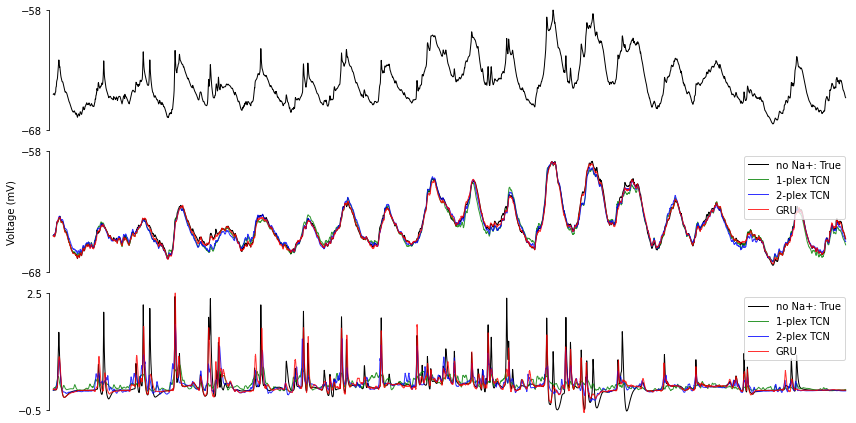

In [6]:
mpl.rcParams['pdf.fonttype'] = 42
fig, axs = plt.subplots(nrows=3, figsize = (12,6))

axs[0].plot(np.arange(0,2.4,1/5000), true4_na[-1][17000:29000], linewidth=1, color="black")
axs[0].margins(x=0.005, y=0.005)
axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)
axs[0].spines.bottom.set_visible(False)
axs[0].spines.left.set_bounds(-68,-58)
axs[0].set_yticks([-68,-58])
axs[0].set_xticks([])

axs[1].plot(np.arange(0,2.4,1/5000), true4_nona[-1][17000:29000], linewidth=1, color="black", label="no Na+: True")
axs[1].plot(np.arange(0,2.4,1/5000), one4_nona_test[-1][17000:29000], linewidth=1, color="green", label="1-plex TCN", alpha=0.8)
axs[1].plot(np.arange(0,2.4,1/5000), two4_nona_test[-1][17000:29000], linewidth=1, color="blue", label="2-plex TCN", alpha=0.8)
axs[1].plot(np.arange(0,2.4,1/5000), gru4_nona_test[-1][17000:29000], linewidth=1, color="red", label="GRU", alpha=0.8)
axs[1].legend(loc="upper right")
axs[1].margins(x=0.005, y=0.005)
axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].spines.bottom.set_visible(False)
axs[1].spines.left.set_bounds(-68,-58)
axs[1].set_yticks([-68,-58])
axs[1].set_xticks([])
axs[1].set_ylabel("Voltage (mV)")

axs[2].plot(np.arange(0,2.4,1/5000), true4_diff[-1][17000:29000], linewidth=1, color="black", label="no Na+: True")
axs[2].plot(np.arange(0,2.4,1/5000), one4_diff_test[-1][17000:29000], linewidth=1, color="green", label="1-plex TCN", alpha=0.8)
axs[2].plot(np.arange(0,2.4,1/5000), two4_diff_test[-1][17000:29000], linewidth=1, color="blue", label="2-plex TCN", alpha=0.8)
axs[2].plot(np.arange(0,2.4,1/5000), gru4_diff_test[-1][17000:29000], linewidth=1, color="red", label="GRU", alpha=0.8)
axs[2].legend(loc="upper right")
axs[2].margins(x=0.005, y=0.005)
axs[2].spines.right.set_visible(False)
axs[2].spines.top.set_visible(False)
axs[2].spines.bottom.set_visible(False)
axs[2].spines.left.set_bounds(-0.5,2.5)
axs[2].set_yticks([-0.5,2.5])
axs[2].set_xticks([])


fig.tight_layout()
plt.show()

## Boxplots

In [17]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean

one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

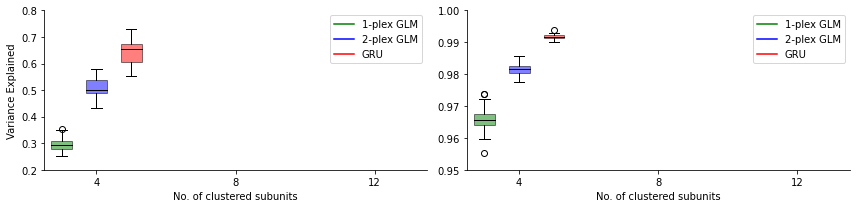

In [19]:
diff_var_exp_array = np.zeros((3,3,20))
nona_var_exp_array = np.zeros((3,3,20))

for i in range(20):
    diff_var_exp_array[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_test[i])
    diff_var_exp_array[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_test[i])
    diff_var_exp_array[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_test[i])
    nona_var_exp_array[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_test[i])
    nona_var_exp_array[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_test[i])
    nona_var_exp_array[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_test[i])
    
fig, axs = plt.subplots(ncols=2, figsize = (12,3))
colors = ["green", "blue", "red"]

# first boxplot pair
bp = axs[0].boxplot(diff_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = axs[0].boxplot(diff_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = axs[0].boxplot(diff_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
axs[0].set_xticks([2,6,10])
axs[0].set_xticklabels(["4", "8", "12"])
axs[0].set_xlabel("No. of clustered subunits")
axs[0].set_ylabel("Variance Explained")
axs[0].set_ylim(0.2,0.8)
axs[0].margins(x=0.005, y=0.005)
axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)

hB, = axs[0].plot(1,1,'blue')
hR, = axs[0].plot(1,1,'red')
hG, = axs[0].plot(1,1,'green')
axs[0].legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

# first boxplot pair
bp = axs[1].boxplot(nona_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = axs[1].boxplot(nona_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = axs[1].boxplot(nona_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
axs[1].set_xticks([2,6,10])
axs[1].set_xticklabels(["4", "8", "12"])
axs[1].set_xlabel("No. of clustered subunits")
axs[1].set_ylim(0.95,1)
axs[1].margins(x=0.005, y=0.005)
axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].spines.top.set_visible(False)

hB, = axs[1].plot(1,1,'blue')
hR, = axs[1].plot(1,1,'red')
hG, = axs[1].plot(1,1,'green')
axs[1].legend((hG, hB, hR),('1-plex GLM', '2-plex GLM', 'GRU'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

fig.tight_layout()
plt.show()

## Nonlin + Kernels

In [3]:
two4_diff_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["e_kern"]
two4_diff_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["i_kern"]
two4_diff_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["nonlin_in"]

print(two4_diff_ekern.shape)
print(two4_diff_nonlin.shape)

(10, 2, 500)
(20, 10, 2, 50000)


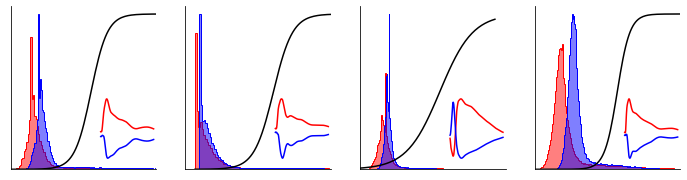

In [71]:
fig, axs = plt.subplots(ncols=4, figsize = (12,3))

bin_no = 250

# Subunit 1 #
y1, x1, _ = axs[0].hist(two4_diff_nonlin[:,6,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = axs[0].hist(two4_diff_nonlin[:,6,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[0].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_xlim(min_x, 4)

ins = axs[0].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[6,0,:], color="red")
ins.plot(two4_diff_ekern[6,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 2 #
y1, x1, _ = axs[1].hist(two4_diff_nonlin[:,7,1,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = axs[1].hist(two4_diff_nonlin[:,7,0,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[1].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].set_xlim(min_x-0.5, 3)

ins = axs[1].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[7,1,:], color="red")
ins.plot(two4_diff_ekern[7,0,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 3 #
y1, x1, _ = axs[2].hist(two4_diff_nonlin[:,8,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = axs[2].hist(two4_diff_nonlin[:,8,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[2].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[2].spines.right.set_visible(False)
axs[2].spines.top.set_visible(False)
axs[2].set_yticks([])
axs[2].set_xticks([])
axs[2].set_xlim(min_x, 2)

ins = axs[2].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[8,0,:], color="red")
ins.plot(two4_diff_ekern[8,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

# Subunit 4 #
y1, x1, _ = axs[3].hist(two4_diff_nonlin[:,9,0,:].flatten(), bins=bin_no, density=True, histtype="stepfilled", fc=(1,0,0,0.5), ec=(1,0,0,1))
y2, x2, _ = axs[3].hist(two4_diff_nonlin[:,9,1,:].flatten()*(-1), bins=bin_no, density=True, histtype="stepfilled", fc=(0,0,1,0.5), ec=(0,0,1,1))

min_x = min(np.min(x1), np.min(x2))
max_x = max(np.max(x2), np.max(x2))
max_y = max(np.max(y1), np.max(y2))
x = np.arange(min_x, max_x, 0.1)
axs[3].plot(x, (np.tanh(x)*0.5+0.5)*max_y, color="black")
axs[3].spines.right.set_visible(False)
axs[3].spines.top.set_visible(False)
axs[3].set_yticks([])
axs[3].set_xticks([])
axs[3].set_xlim(min_x, 5)

ins = axs[3].inset_axes([0.6,0.05,0.4,0.4])
ins.plot(two4_diff_ekern[9,0,:], color="red")
ins.plot(two4_diff_ekern[9,1,:], color="blue")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.spines.left.set_visible(False)
ins.set_xticks([])
ins.set_yticks([])

plt.show()

## Subunit vs Dend. Compartment

In [47]:
one4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["sub_out"][-1,-4:]
two4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["sub_out"][-1,-4:]
gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["sub_out"][-1,-4:]
true4_dend = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy").reshape(4,1000,50001)[:,-1,:50000]

one4_diff_subout -= np.mean(one4_diff_subout, axis=1).reshape(-1,1)
two4_diff_subout -= np.mean(two4_diff_subout, axis=1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

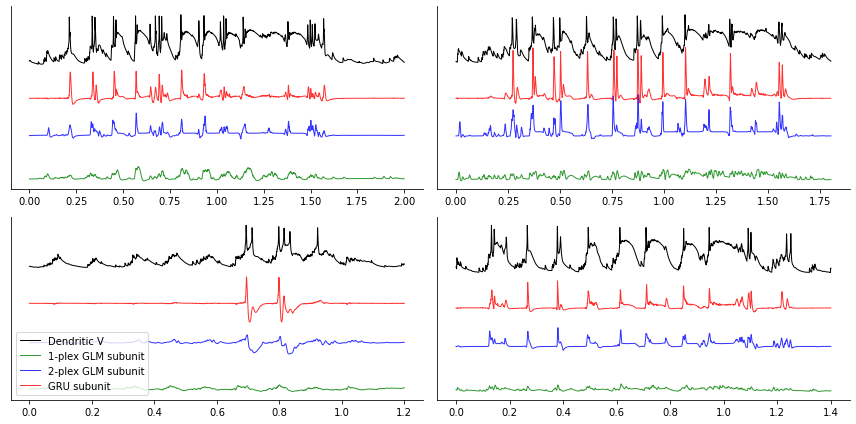

In [67]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

axs[0,0].plot(np.arange(0,2,1/5000), true4_dend[0][16000:26000]/10+25, linewidth=1, color="black", label="Dendritic V")
axs[0,0].plot(np.arange(0,2,1/5000), one4_diff_subout[0][16000:26000]*5, linewidth=1, color="green", alpha=0.8, label="1-plex GLM subunit")
axs[0,0].plot(np.arange(0,2,1/5000), two4_diff_subout[0][16000:26000]*5+7, linewidth=1, color="blue", alpha=0.8, label="2-plex GLM subunit")
axs[0,0].plot(np.arange(0,2,1/5000), gru4_diff_subout[0][16000:26000]*5+13, linewidth=1, color="red", alpha=0.8, label="GRU subunit")

axs[0,1].plot(np.arange(0,1.8,1/5000), true4_dend[1][17000:26000]/10+25, linewidth=1, color="black")
axs[0,1].plot(np.arange(0,1.8,1/5000), one4_diff_subout[1][17000:26000]*5, linewidth=1, color="green", alpha=0.8)
axs[0,1].plot(np.arange(0,1.8,1/5000), two4_diff_subout[1][17000:26000]*5+7, linewidth=1, color="blue", alpha=0.8)
axs[0,1].plot(np.arange(0,1.8,1/5000), gru4_diff_subout[1][17000:26000]*5+13, linewidth=1, color="red", alpha=0.8)

axs[1,0].plot(np.arange(0,1.2,1/5000), true4_dend[2][21000:27000]/10+25, linewidth=1, color="black", label="Dendritic V")
axs[1,0].plot(np.arange(0,1.2,1/5000), one4_diff_subout[2][21000:27000]*5, linewidth=1, color="green", alpha=0.8, label="1-plex GLM subunit")
axs[1,0].plot(np.arange(0,1.2,1/5000), two4_diff_subout[2][21000:27000]*5+7, linewidth=1, color="blue", alpha=0.8, label="2-plex GLM subunit")
axs[1,0].plot(np.arange(0,1.2,1/5000), gru4_diff_subout[2][21000:27000]*5+13, linewidth=1, color="red", alpha=0.8, label="GRU subunit")
axs[1,0].legend(loc="lower left")

axs[1,1].plot(np.arange(0,1.4,1/5000), true4_dend[3][22000:29000]/10+25, linewidth=1, color="black")
axs[1,1].plot(np.arange(0,1.4,1/5000), one4_diff_subout[3][22000:29000]*5, linewidth=1, color="green", alpha=0.8)
axs[1,1].plot(np.arange(0,1.4,1/5000), two4_diff_subout[3][22000:29000]*5+7, linewidth=1, color="blue", alpha=0.8)
axs[1,1].plot(np.arange(0,1.4,1/5000), gru4_diff_subout[3][22000:29000]*5+13, linewidth=1, color="red", alpha=0.8)

for row in range(2):
    for col in range(2):
        axs[row,col].spines.right.set_visible(False)
        axs[row,col].spines.top.set_visible(False)
        axs[row,col].set_yticks([])
        
fig.tight_layout()
plt.show()

## threshold voltages

In [2]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000*20:].reshape(20,50000)

one4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"] + true4_na_mean
two4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"] + true4_na_mean
gru4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true4_na_mean

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean

one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

In [10]:
thresh_bin_no = 100

na_means = np.zeros((thresh_bin_no, 4))
na_stds = np.zeros((thresh_bin_no, 4))
na_bins = np.linspace(np.min(true4_na), np.max(true4_na), thresh_bin_no+1)

nona_means = np.zeros((thresh_bin_no, 4))
nona_stds = np.zeros((thresh_bin_no, 4))
nona_bins = np.linspace(np.min(true4_nona), np.max(true4_nona), thresh_bin_no+1)

diff_means = np.zeros((thresh_bin_no, 4))
diff_stds = np.zeros((thresh_bin_no, 4))
diff_bins = np.linspace(np.min(true4_diff), np.max(true4_diff), thresh_bin_no+1)

for i in range(thresh_bin_no):
    na_idx = np.where((true4_na.flatten() >= na_bins[i]) & (true4_na.flatten() < na_bins[i+1]))[0]
    na_means[i,1] = np.mean(one4_na_test.flatten()[na_idx])
    na_means[i,2] = np.mean(two4_na_test.flatten()[na_idx])
    na_means[i,3] = np.mean(gru4_na_test.flatten()[na_idx])
    na_means[i,0] = (na_bins[i] + na_bins[i+1])/2
    na_stds[i,0] = (na_bins[i] + na_bins[i+1])/2
    na_stds[i,1] = np.std(one4_na_test.flatten()[na_idx])
    na_stds[i,2] = np.std(two4_na_test.flatten()[na_idx])
    na_stds[i,3] = np.std(gru4_na_test.flatten()[na_idx])
    
    nona_idx = np.where((true4_nona.flatten() >= nona_bins[i]) & (true4_nona.flatten() < nona_bins[i+1]))[0]
    nona_means[i,1] = np.mean(one4_nona_test.flatten()[nona_idx])
    nona_means[i,2] = np.mean(two4_nona_test.flatten()[nona_idx])
    nona_means[i,3] = np.mean(gru4_nona_test.flatten()[nona_idx])
    nona_means[i,0] = (nona_bins[i] + nona_bins[i+1])/2
    nona_stds[i,0] = (nona_bins[i] + nona_bins[i+1])/2
    nona_stds[i,1] = np.std(one4_nona_test.flatten()[nona_idx])
    nona_stds[i,2] = np.std(two4_nona_test.flatten()[nona_idx])
    nona_stds[i,3] = np.std(gru4_nona_test.flatten()[nona_idx])
    
    diff_idx = np.where((true4_diff.flatten() >= diff_bins[i]) & (true4_diff.flatten() < diff_bins[i+1]))[0]
    diff_means[i,1] = np.mean(one4_diff_test.flatten()[diff_idx])
    diff_means[i,2] = np.mean(two4_diff_test.flatten()[diff_idx])
    diff_means[i,3] = np.mean(gru4_diff_test.flatten()[diff_idx])
    diff_means[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,1] = np.std(one4_diff_test.flatten()[diff_idx])
    diff_stds[i,2] = np.std(two4_diff_test.flatten()[diff_idx])
    diff_stds[i,3] = np.std(gru4_diff_test.flatten()[diff_idx])

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


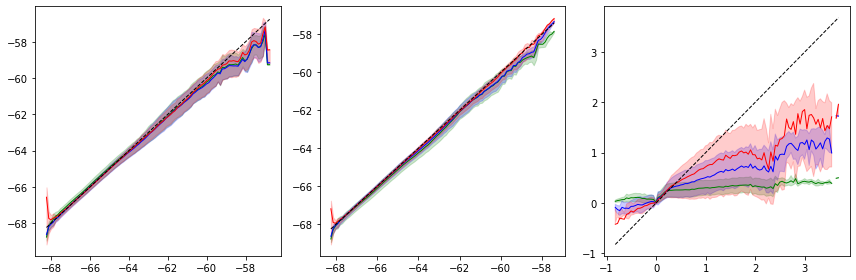

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(12,4))

axs[0].plot(na_means[:,0],na_means[:,1], linewidth=1, color="green")
axs[0].plot(na_means[:,0],na_means[:,2], linewidth=1, color="blue")
axs[0].plot(na_means[:,0],na_means[:,3], linewidth=1, color="red")
axs[0].fill_between(na_means[:,0], na_means[:,1]-na_stds[:,1], na_means[:,1]+na_stds[:,1], color="green", alpha=0.2)
axs[0].fill_between(na_means[:,0], na_means[:,2]-na_stds[:,2], na_means[:,2]+na_stds[:,2], color="blue", alpha=0.2)
axs[0].fill_between(na_means[:,0], na_means[:,2]-na_stds[:,3], na_means[:,3]+na_stds[:,3], color="red", alpha=0.2)
axs[0].plot(na_means[:,0], na_means[:,0], linewidth=1, color="black", linestyle="--")

axs[1].plot(nona_means[:,0],nona_means[:,1], linewidth=1, color="green")
axs[1].plot(nona_means[:,0],nona_means[:,2], linewidth=1, color="blue")
axs[1].plot(nona_means[:,0],nona_means[:,3], linewidth=1, color="red")
axs[1].fill_between(nona_means[:,0], nona_means[:,1]-nona_stds[:,1], nona_means[:,1]+nona_stds[:,1], color="green", alpha=0.2)
axs[1].fill_between(nona_means[:,0], nona_means[:,2]-nona_stds[:,2], nona_means[:,2]+nona_stds[:,2], color="blue", alpha=0.2)
axs[1].fill_between(nona_means[:,0], nona_means[:,2]-nona_stds[:,3], nona_means[:,3]+nona_stds[:,3], color="red", alpha=0.2)
axs[1].plot(nona_means[:,0], nona_means[:,0], linewidth=1, color="black", linestyle="--")

axs[2].plot(diff_means[:,0],diff_means[:,1], linewidth=1, color="green")
axs[2].plot(diff_means[:,0],diff_means[:,2], linewidth=1, color="blue")
axs[2].plot(diff_means[:,0],diff_means[:,3], linewidth=1, color="red")
axs[2].fill_between(diff_means[:,0], diff_means[:,1]-diff_stds[:,1], diff_means[:,1]+diff_stds[:,1], color="green", alpha=0.2)
axs[2].fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,2], diff_means[:,2]+diff_stds[:,2], color="blue", alpha=0.2)
axs[2].fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,3], diff_means[:,3]+diff_stds[:,3], color="red", alpha=0.2)
axs[2].plot(diff_means[:,0], diff_means[:,0], linewidth=1, color="black", linestyle="--")
    
fig.tight_layout()
plt.show()

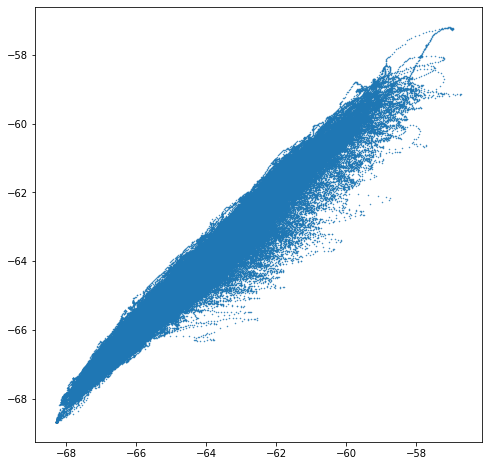

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(true4_na.flatten(), two4_na_test.flatten(), s=0.2)

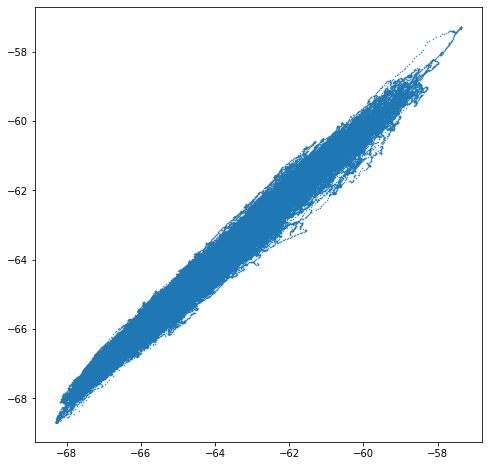

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(true4_nona.flatten(), two4_nona_test.flatten(), s=0.2)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(true4_nona.flatten(), two4_nona_test.flatten(), s=0.2)